# Seaborn

### Introducción

Seaborn es una libreria para hacer graficos estadísticos atractivos e informativos en Python. Esta construído sobre [matplotlib](http://matplotlib.org/) y esta altamente integrada con [PyData](http://pydata.org/) stack, incluye suporte para estructuras de datos de [numpy](http://www.numpy.org/) y [pandas](http://pandas.pydata.org/), y rutinas estadísticas de [scipy](http://scipy.org/) y [statmodels](http://statsmodels.sourceforge.net/).  

Algunas de las características que ofrece seaborn son:  
- Varios temas integrados que mejoran la estética por defecto de matplotlib 
- Herramientas para elegir paletas de colores que hacen hermosos gráficos, que revelan patrones en tus datos
- Funciones para visualizar distribuciones univariantes y bivariantes o para compararlas con subconjuntos de datos
- Herramientas que ajustan y visualizan modelos de regresión lineal para diferentes tipos de variables dependientes o independientes
- Funciones que visualizan matrices de datos y usa algoritmos de agrupamiento (*clustering*) para descubrir la estructuras en esas matrices
- Una función para graficar series estadísitcas de datos de tiempo (*timeseries data*) con estimación flexible y representación de la incertidumbre alrededor de la estimación
- Abstracción de alto nivel para grillas estructuradas de graficos que permite crear facilmente visualizaciones complejas

Seaborn ayuda a hacer de las visulizaciones una parte central de la exploración y entendemiento de los datos. Las funciones de ploteo oprean sobre *dataframes* y matrices (*arrays*) que contiene todo un conjunto de datos e internamente llevan a cabo las agregaciones necesarias y los ajustes de modelos estadísticos para producir gráficos informativos. Si matplotlib "trata de hacer fácil las cosas faciles y posible las cosas difíciles", seaborn trata de hacer fácil un grupo bien definido de cosas difíciles.  

Las funciones de ploteo tratan de hacer algo útil cuando son llamadas con un conjunto mínimo de argumentos, y tienen un número de opciones personalizables mediante parametros adicionales. Algunas de las funciones grafican directamente dentro del objeto matplotlib axes, mientras que otras operan sobre un figura entera y producen gráficos con varios paneles. En este último caso, el gráfico es dibujado usando un objeto Grid que enlaza la estructura de la figura a la estructura del *dataset* en una manera abstracta.  

Debido a seaborn utiliza matplotlib, los gráficos pueden ser retocados usando las herramientas de matplotlib y ser *renderizados* con cualquiera de sus *backends* para generar figuras con calidad de publicación.Seaborn también puede ser utilizado para generar gráficos basados en la web mediante las librerias [mpld3](http://mpld3.github.io/) y [Bokeh](http://bokeh.pydata.org/).  

Seaborn debe ser pensado como un complemento de matplotlib, no como un reemplazo. Cuando usamos seaborn, es probable que invoquemos funciones de matplotlib directamente para graficar funciones simples que ya estan disponibles a través del *namespace* `pyplot`. Además, mientras que el objetivo de las funciones de seaborn es hacer gráficos que tienen una "producción lista" (incluyendo la extracción de información semántica de objetos de Pandas para el agreado de etiquetas informativas), la personalización completa de la figura requerira un entendimiento sofisticado de los objetos de matplotlib.

Para información mas detallada y ejemplos, se pueden revisar los siguientes enlaces: [galería de ejemplos](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html#example-gallery), [tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html#tutorial) o [referencias de API](http://stanford.edu/~mwaskom/software/seaborn/api.html#api-ref)

*Introducción adaptada de [acá](http://stanford.edu/~mwaskom/software/seaborn/introduction.html#introduction)*



Matplotlib is a useful tool, but it leaves much to be desired. There are several valid complaints about matplotlib that often come up:

- Matplotlib’s defaults are not exactly the best choices. It was based off of MatLab circa 1999, and this shows.
- Matplotlib is relatively low-level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.
- Matplotlib is not designed for use with Pandas dataframes. In order to visualize data from a Pandas dataframe, you must extract each series and often concatenate these series’ together into the right format.

The answer to these problems is Seaborn. Seaborn provides an API on top of matplotlib which uses sane plot & color defaults, uses simple functions for common statistical plot types, and which integrates with the functionality provided by Pandas dataframes.  

## Controlling figure aesthetics

Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it's nice to have plots that are pleasant to look at. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it's even more necessary to have figures that catch the attention and draw a viewer in.

Matplotlib is highly customizable, but it can be hard to know what settings to tweak to achieve an attractive plot. Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "aesthetics")))

Let's define a simple function to plot some offset sine waves, which will help us see the different stylistic parameters we can tweak.

In [3]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

This is what the plot looks like with matplotlib defaults:

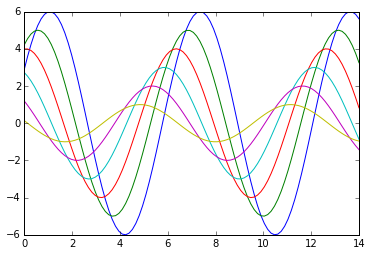

In [4]:
sinplot()

To switch to seaborn defaults, simply import the package.

In [4]:
import seaborn as sns

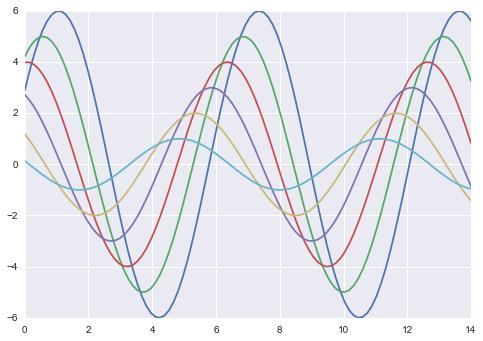

In [4]:
sinplot()

The seaborn defaults break from the MATLAB inspired aesthetic of matplotlib to plot in more muted colors over a light gray background with white grid lines. We find that the grid aids in the use of figures for conveying quantitative information – in almost all cases, figures should be preferred to tables. The white-on-gray grid that is used by default avoids being obtrusive. The grid is particularly useful in giving structure to figures with multiple facets, which is central to some of the more complex tools in the library.

Seaborn splits matplotlib parameters into two independent groups. The first group sets the aesthetic style of the plot, and the second scales various elements of the figure so that it can be easily incorporated into different contexts.

The interface for manipulating these parameters are two pairs of functions. To control the style, use the `axes_style` and `set_style` functions. To scale the plot, use the `plotting_context` and `set_context` functions. In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.  

### Styling figures with `axes_style` and `set_style`

There are five preset seaborn themes: ``darkgrid``, ``whitegrid``, ``dark``, ``white``, and ``ticks``. They are each suited to different applications and personal preferences. The default theme is ``darkgrid``. As mentioned above, the grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The ``whitegrid`` theme is similar, but it is better suited to plots with heavy data elements:

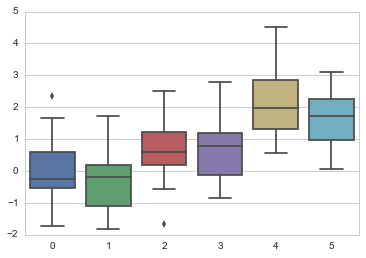

In [14]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

For many plots, (especially for settings like talks, where you primarily want to use figures to provide impressions of patterns in the data), the grid is less necessary.

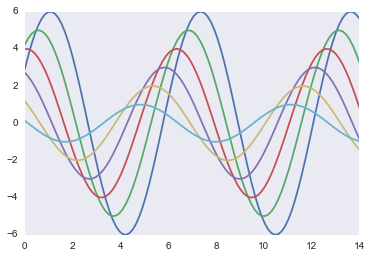

In [15]:
sns.set_style("dark")
sinplot()

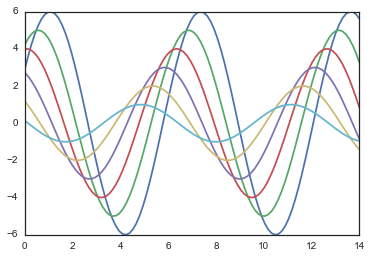

In [16]:
sns.set_style("white")
sinplot()

Sometimes you might want to give a little extra structure to the plots, which is where ticks come in handy:

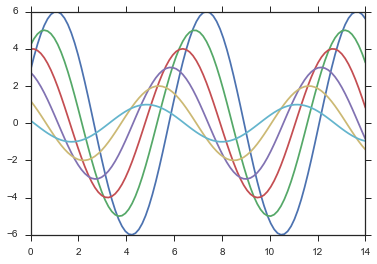

In [17]:
sns.set_style("ticks")
sinplot()

### Removing spines with `despine`

Both the `white` and `ticks` styles can benefit from removing the top and right axes spines, which are not needed. It's impossible to do this through the matplotlib parameters, but you can call the seaborn function `despine` to remove them:

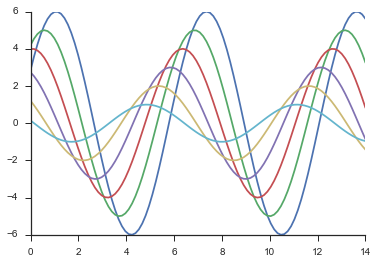

In [18]:
sinplot()
sns.despine()

Some plots benefit from offsetting the spines away from the data, which can also be done when calling `despine`. When the ticks don't cover the whole range of the axis, the ``trim`` parameter will limit the range of the surviving spines.

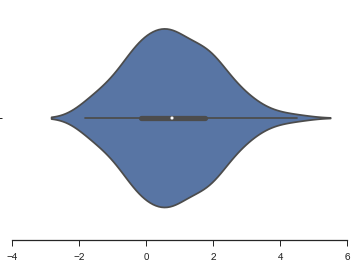

In [19]:
#f, ax = plt.subplots()
sns.violinplot(data)
sns.despine(offset=10, trim=True);

You can also control which spines are removed with additional arguments to `despine`:

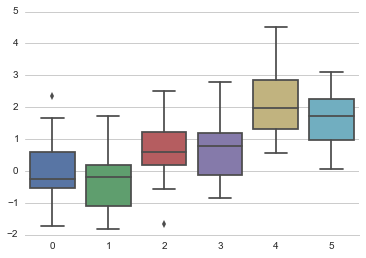

In [20]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

### Temporarily setting figure style

Although it's easy to switch back and forth, you can also use the `axes_style` function in a ``with`` statement to temporarily set plot parameters. This also allows you to make figures with differently-styled axes:

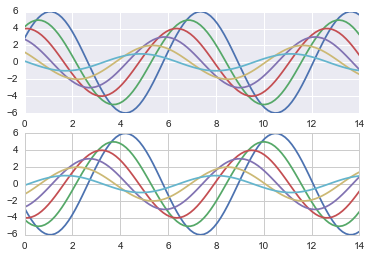

In [21]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

### Overriding elements of the seaborn styles

If you want to customize the seaborn styles, you can pass a dictionary of parameters to the ``rc`` argument of `axes_style` and `set_style`. Note that you can only override the parameters that are part of the style definition through this method. (However, the higher-level `set` function takes a dictionary of any matplotlib parameters).

If you want to see what parameters are included, you can just call the function with no arguments, which will return the current settings:

In [22]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

You can then set different versions of these parameters:

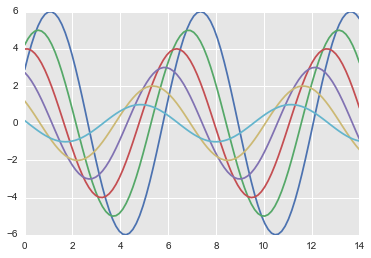

In [23]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

### Scaling plot elements with `plotting_context` and `set_context`

A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

First let's reset the default parameters by calling `set`:

In [24]:
sns.set()

The four preset contexts, in order of relative size, are ``paper``, ``notebook``, ``talk``, and ``poster``. The ``notebook`` style is the default, and was used in the plots above.

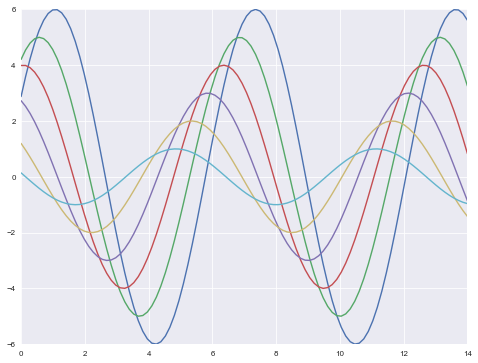

In [25]:
sns.set_context("paper")
plt.figure(figsize=(8, 6))
sinplot()

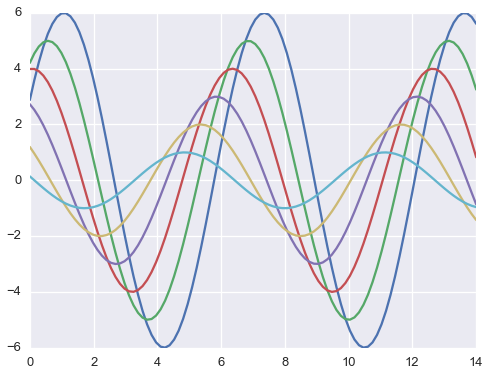

In [26]:
sns.set_context("talk")
plt.figure(figsize=(8, 6))
sinplot()

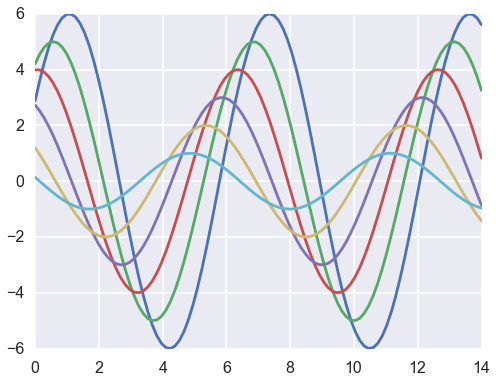

In [27]:
sns.set_context("poster")
plt.figure(figsize=(8, 6))
sinplot()

Most of what you now know about the style functions should transfer to the context functions.

You can call `set_context` with one of these names to set the parameters, and you can override the parameters by providing a dictionary of parameter values.

You can also independently scale the size of the font elements when changing the context. (This option is also available through the top-level `set` function).

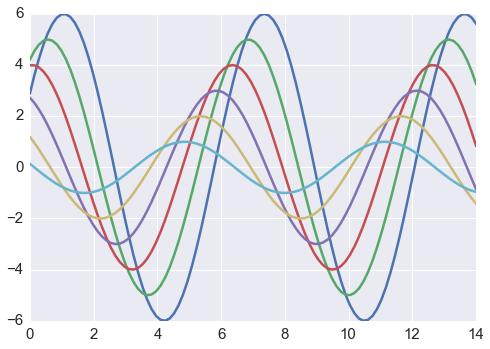

In [28]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

Similarly (although it might be less useful), you can temporarily control the scale of figures nested under a `with` statement.

Both the style and the context can be quickly configured with the `set` function. This function also sets the default color palette, but that will be covered in more detail in the next section of the tutorial.

# Choosing color palettes

Color is more important than other aspects of figure style because color can reveal patterns in the data if used effectively or hide those patterns if used poorly. There are a number of great resources to learn about good techniques for using color in visualizations, I am partial to this [series of blog posts](http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/) from Rob Simmon and this [more technical paper](http://www.sandia.gov/~kmorel/documents/ColorMaps/ColorMapsExpanded.pdf). The matplotlib docs also now have a [nice tutorial](http://matplotlib.org/users/colormaps.html) that illustrates some of the perceptual properties of the built in colormaps.

Seaborn makes it easy to select and use color palettes that are suited to the kind of data you are working with and the goals you have in visualizing it.

In [29]:
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

### Building color palettes with `color_palette()`

The most important function for working with discrete color palettes is `color_palette()`. This function provides an interface to many (though not all) of the possible ways you can generate colors in seaborn, and it's used internally by any function that has a ``palette`` argument (and in some cases for a ``color`` argument when multiple colors are needed).

`color_palette()` will accept the name of any seaborn palette or matplotlib colormap (except ``jet``, which you should never use). It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). The return value is always a list of RGB tuples.

Finally, calling `color_palette()` with no arguments will return the current default color cycle.

A corresponding function, `set_palette()`, takes the same arguments and will set the default color cycle for all plots. You can also use `color_palette()` in a ``with`` statement to temporarily change the default palette (see below).

It is generally not possible to know what kind of color palette or colormap is best for a set of data without knowing about the characteristics of the data. Following that, we'll break up the different ways to use `color_palette()` and other seaborn palette functions by the three general kinds of color palettes: *qualitative*, *sequential*, and *diverging*.

## Qualitative color palettes

Qualitative (or categorical) palettes are best when you want to distinguish discrete chunks of data that do not have an inherent ordering.

When importing seaborn, the default color cycle is changed to a set of six colors that evoke the standard matplotlib color cycle while aiming to be a bit more pleasing to look at.

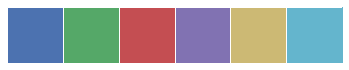

In [30]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

There are six variations of the default theme, called ``deep``, ``muted``, ``pastel``, ``bright``, ``dark``, and ``colorblind``.

### Using circular color systems

When you have more than six categories to distinguish, the easiest thing is to draw evenly-spaced colors in a circular color space (such that the hue changes which keeping the brightness and saturation constant). This is what most seaborn functions default to when they need to use more colors than are currently set in the default color cycle.

The most common way to do this uses the ``hls`` color space, which is a simple transformation of RGB values.

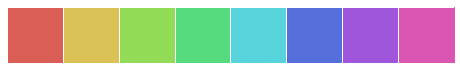

In [31]:
sns.palplot(sns.color_palette("hls", 8))

There is also the `hls_palette()` function that lets you control the lightness and saturation of the colors.

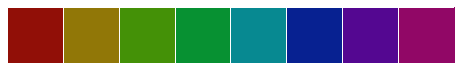

In [32]:
sns.palplot(sns.hls_palette(8, l=.3, s=.9))

However, because of the way the human visual system works, colors that are even "intensity" in terms of their RGB levels won't necessarily look equally intense. [We perceive](http://en.wikipedia.org/wiki/Color_vision) yellows and greens as relatively brighter and blues as relatively darker, which can be a problem when aiming for uniformity with the ``hls`` system.

To remedy this, seaborn provides an interface to the [husl](http://www.boronine.com/husl/) system, which also makes it easy to select evenly spaced hues while keeping the apparent brightness and saturation much more uniform.

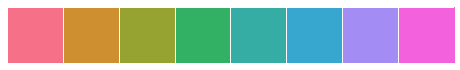

In [33]:
sns.palplot(sns.color_palette("husl", 8))

There is similarly a function called `husl_palette()` that provides a more flexible interface to this system.

### Using categorical Color Brewer palettes

Another source of visually pleasing categorical palettes comes from the [Color Brewer](http://colorbrewer2.org/) tool (which also has sequential and diverging palettes, as we'll see below). These also exist as matplotlib colormaps, but they are not handled properly. In seaborn, when you ask for a qualitative Color Brewer palette, you'll always get the discrete colors, but this means that at a certain point they will begin to cycle.

A nice feature of the Color Brewer website is that it provides some guidance on which palettes are color blind safe. There are a variety of [kinds](http://en.wikipedia.org/wiki/Color_blindness) of color blindness, but the most common variant leads to difficulty distinguishing reds and greens. It's generally a good idea to avoid using red and green for plot elements that need to be discriminated based on color.

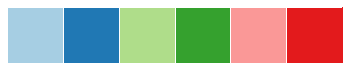

In [34]:
sns.palplot(sns.color_palette("Paired"))

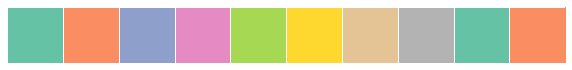

In [35]:
sns.palplot(sns.color_palette("Set2", 10))

To help you choose palettes from the Color Brewer library, there is the `choose_colorbrewer_palette()` function. This function, which must be used in an IPython notebook, will launch an interactive widget that lets you browse the various options and tweak their parameters.

Of course, you might just want to use a set of colors you particularly like together. Because `color_palette()` accepts a list of colors, this is easy to do.

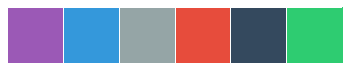

In [36]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

### Using named colors from the xkcd color survey

A while back, [xkcd](http://xkcd.com/) ran a [crowdsourced effort](http://blog.xkcd.com/2010/05/03/color-survey-results/) to name random RGB colors. This produced a set of [954 named colors](http://xkcd.com/color/rgb/), which you can now reference in seaborn using the ``xkcd_rgb`` dictionary:

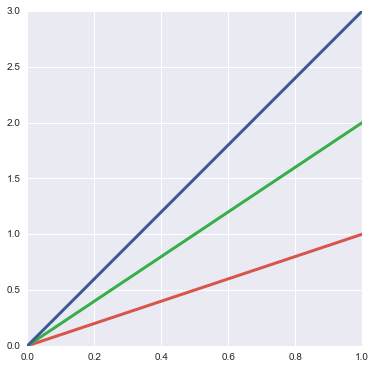

In [37]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);

If you want to spend some time picking colors, this [interactive visualization](http://www.luminoso.com/colors/) may be useful. In addition to pulling out single colors from the ``xkcd_rgb`` dictionary, you can also pass a list of names to the `xkcd_palette()` function.

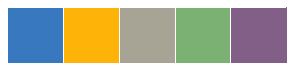

In [38]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

### Sequential color palettes

The second major class of color palettes is called "sequential". This kind of color mapping is appropriate when data range from relatively low or unintersting values to relatively high or interesting values. Although there are cases where you will want discrete colors in a sequential palette, it's more common to use them as a colormap in functions like `kdeplot()` or `corrplot()` (along with similar matplotlib functions).

It's common to see colormaps like ``jet`` (or other rainbow palettes) used in this case, becuase the range of hues gives the impression of providing additional information about the data. However, colormaps with large hue shifts tend to introduce discontinuities that don't exist in the data, and our visual system isn't able to naturally map the rainbow to quantitative distinctions like "high" or "low". The result is that these visualizations end up being more like a puzzle, and they obscure patterns in the data rather than revealing them. The jet palette is [particularly bad](http://abandonmatlab.wordpress.com/2011/05/07/lets-talk-colormaps/) because the brightest colors, yellow and cyan, are used for intermediate data values. This has the effect of emphasizing uninteresting (and arbitrary) values while demphasizing the extremes.

For sequential data, it's better to use palettes that have at most a relatively subtle shift in hue accompanied by a large shift in brightness and saturation. This approach will naturally draw the eye to the relatively important parts of the data.

The Color Brewer library has a great set of these palettes. They're named after the dominant color (or colors) in the palette.

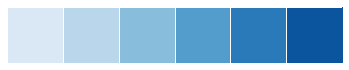

In [39]:
sns.palplot(sns.color_palette("Blues"))

Like in matplotlib, if you want the lightness ramp to be reversed, you can add a ``_r`` suffix to the palette name.

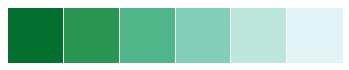

In [40]:
sns.palplot(sns.color_palette("BuGn_r"))

Seaborn also adds a trick that allows you to create "dark" palettes, which do not have as wide a dynamic range. This can be useful if you want to map lines or points sequentially, as brighter-colored lines might otherwise be hard to distinguish.

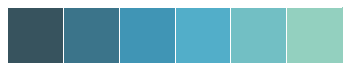

In [41]:
sns.palplot(sns.color_palette("GnBu_d"))

Remember that you may want to use the `choose_colorbrewer_palette()` function to play with the various options, and you can set the ``as_cmap`` argument to ``True`` if you want the return value to be a colormap object that you can pass to seaborn or matplotlib functions.

In [42]:
#Documentación de la función
#choose_colorbrewer_palette()

### Sequential palettes with `cubehelix_palette()`

The [cubehelix](http://www.mrao.cam.ac.uk/~dag/CUBEHELIX/) color palette system makes sequential palettes with a linear increase or decrease in brightness and some variation in hue. This means that the information in your colormap will be preserved when converted to black and white (for printing) or when viewed by a colorblind individual.

Matplotlib has the default cubehelix version built into it:

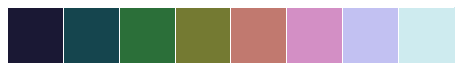

In [43]:
sns.palplot(sns.color_palette("cubehelix", 8))

Seaborn adds an interface to the cubehelix *system* so that you can make a variety of palettes that all have a well-behaved linear brightness ramp.

The default palette returned by the seaborn `cubehelix_palette()` function is a bit different from the matplotlib default in that it does not rotate as far around the hue wheel or cover as wide a range of intensities. It also reverses the order so that more important values are darker:

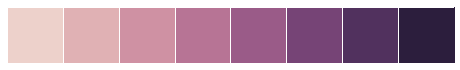

In [44]:
sns.palplot(sns.cubehelix_palette(8))

Other arguments to `cubehelix_palette()` control how the palette looks. The two main things you'll change are the ``start`` (a value between 0 and 3) and ``rot``, or number of rotations (an arbitrary value, but probably within -1 and 1),

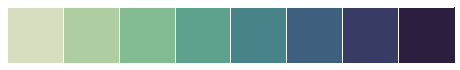

In [45]:
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

You can also control how dark and light the endpoints are and even reverse the ramp:

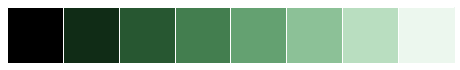

In [46]:
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

By default you just get a list of colors, like any other seaborn palette, but you can also return the palette as a colormap object that can be passed to seaborn or matplotlib functions using ``as_cmap=True``.

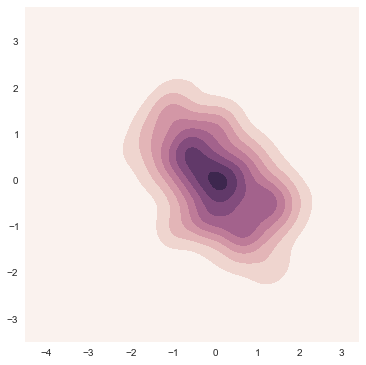

In [47]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

To help select good palettes or colormaps using this system, you can use the `choose_cubehelix_palette()` function in a notebook to launch an interactive app that will let you play with the different parameters. Pass ``as_cmap=True`` if you want the function to return a colormap (rather than a list) for use in function like ``hexbin``.

### Custom sequential palettes with `light_palette()` and `dark_palette()`

For a simpler interface to custom sequential palettes, you can use `light_palette()` or `dark_palette()`, which are both seeded with a single color and produce a palette that ramps either from light or dark desaturated values to that color. These functions are also accompanied by the `choose_light_palette()` and `choose_dark_palette()` functions that launch interactive widgets to create these palettes.

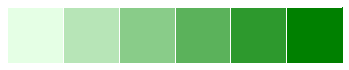

In [48]:
sns.palplot(sns.light_palette("green"))

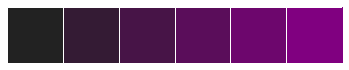

In [49]:
sns.palplot(sns.dark_palette("purple"))

These palettes can also be reversed.

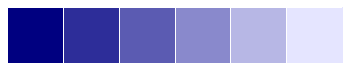

In [50]:
sns.palplot(sns.light_palette("navy", reverse=True))

They can also be used to create colormap objects rather than lists of colors.

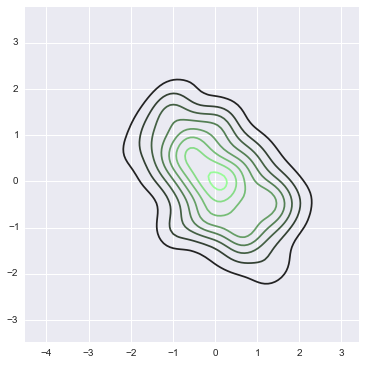

In [51]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);

By default, the input can be any valid matplotlib color. Alternate interpretations are controlled by the ``input`` argument. Currently you can provide tuples in ``hls`` or ``husl`` space along with the default ``rgb``, and you can also seed the palette with any valid ``xkcd`` color.

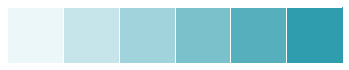

In [52]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

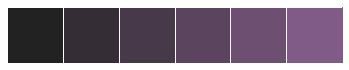

In [53]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

Note that the default input space for the interactive palette widgets is ``husl``, which is different from the default for the function itself, but much more useful in this context.

### Diverging color palettes

The third class of color palettes is called "diverging". These are used for data where both large low and high values are interesting. There is also usually a well-defined midpoint in the data. For instance, if you are plotting changes in temperature from some baseline timepoint, it is best to use a diverging colormap to show areas with relative decreases and areas with relative increases.

The rules for choosing good diverging palettes are similar to good sequential palettes, except now you want to have two relatively subtle hue shifts from distinct starting hues that meet in an under-emphasized color at the midpoint. It's also important that the starting values are of similar brightness and saturation.

It's also important to emphasize here that using red and green should be avoided, as a substantial population of potential viewers will be [unable to distinguish them](http://en.wikipedia.org/wiki/Color_blindness).

It should not surprise you that the Color Brewer library comes with a set of well-choosen diverging colormaps.

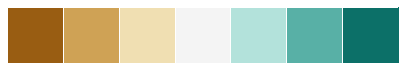

In [54]:
sns.palplot(sns.color_palette("BrBG", 7))

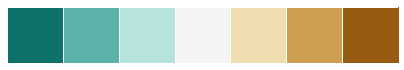

In [55]:
sns.palplot(sns.color_palette("BrBG_r", 7))

Another good choice that is built into matplotlib is the ``coolwarm`` palette. Note that this colormap has less contrast between the middle values and the extremes.

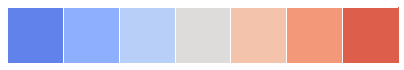

In [56]:
sns.palplot(sns.color_palette("coolwarm", 7))

#### Custom diverging palettes with `diverging_palette`

You can also use the seaborn function `diverging_palette` to create a custom colormap for diverging data. (Naturally there is also a companion interactive widget, `choose_diverging_palette`). This function makes diverging palettes using the ``husl`` color system. You pass it two hues (in degreees) and, optionally, the lightness and saturation values for the extremes. Using ``husl`` means that the extreme values, and the resulting ramps to the midpoint, will be well-balanced

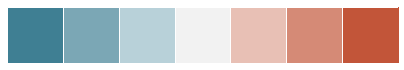

In [57]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

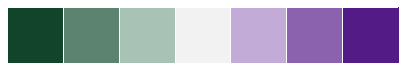

In [58]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

The ``sep`` argument controls the width of the separation between the two ramps in the middle region of the palette.

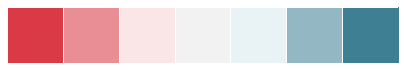

In [59]:
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

It's also possible to make a palette with the midpoint is dark rather than light.

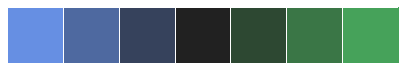

In [60]:
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

### Changing default palettes with `set_palette`

The `color_palette` function has a companion called `set_palette`. The relationship between them is similar to the pairs covered in the **aesthetics tutorial**. `set_palette` accepts the same arguments as `color_palette`, but it changes the default matplotlib parameters so that the palette is used for all plots.

In [61]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

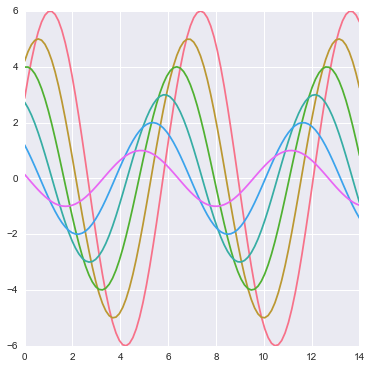

In [62]:
sns.set_palette("husl")
sinplot()

The `color_palette()` function can also be used in a ``with`` statement to temporarily change the color palette.

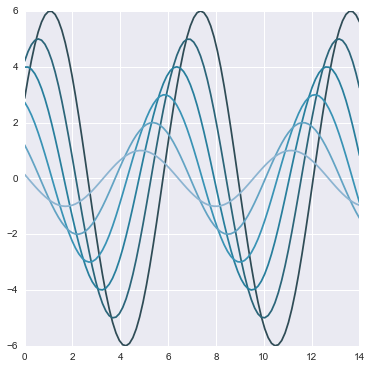

In [63]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

# Visualizing the distribution of a dataset

When dealing with a set of data, often the first thing you'll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seborn for examining univariate and bivariate distributions. You may also want to look at the **categorical plots tutorial** chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [5]:
#import numpy as np
import pandas as pd
from scipy import stats, integrate
#import matplotlib.pyplot as plt

In [6]:
#import seaborn as sns
sns.set(color_codes=True)

In [7]:
np.random.seed(sum(map(ord, "distributions")))

## Plotting univariate distributions

The most convenient way to take a quick look at a univariate distribution in seaborn is the `distplot()` function. By default, this will draw a [histogram](https://en.wikipedia.org/wiki/Histogram) and fit a [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE). 

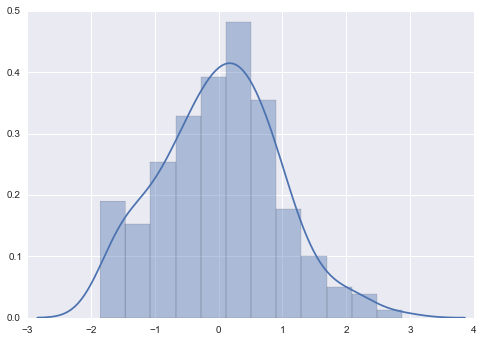

In [67]:
x = np.random.normal(size=200)
sns.distplot(x);

## Histograms

Histograms are likely familiar, and a ``hist`` function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let's remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the `rugplot()` function, but it is also available in `distplot()`:

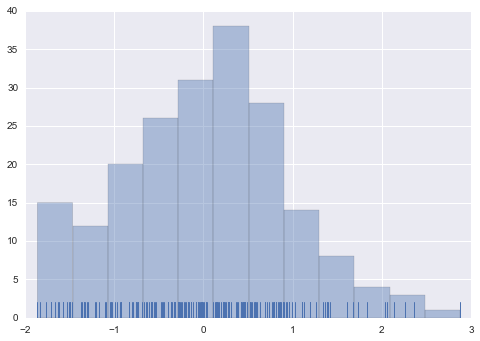

In [68]:
sns.distplot(x, kde=False, rug=True);

When drawing histograms, the main choice you have is the number of bins to use and where to place them. `distplot()` uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

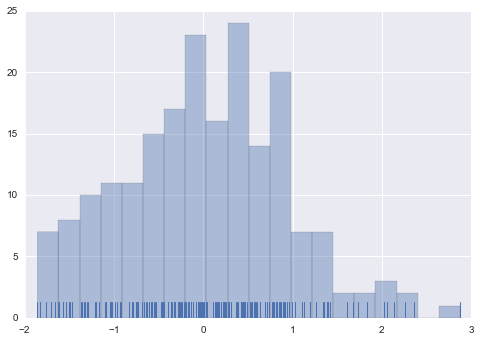

In [69]:
sns.distplot(x, bins=20, kde=False, rug=True);

## Kernel density estimaton

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:

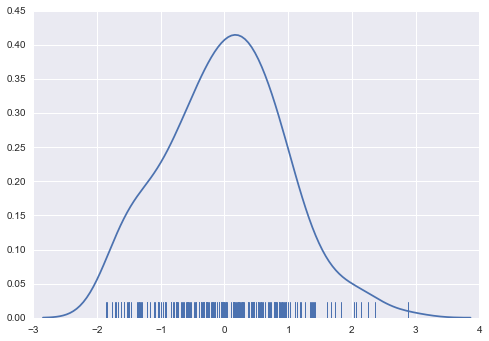

In [70]:
sns.distplot(x, hist=False, rug=True);

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

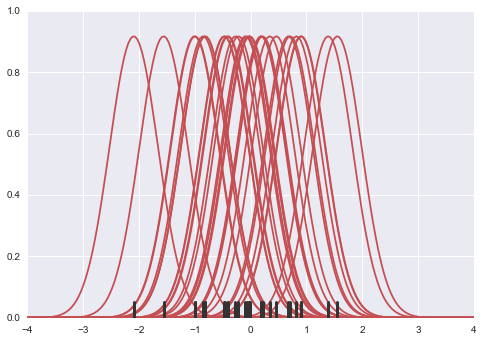

In [71]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

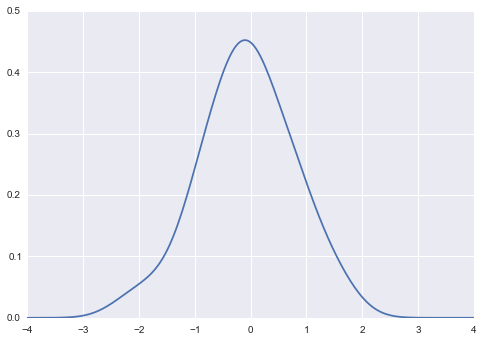

In [72]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

We can see that if we use the `kdeplot()` function in seaborn, we get the same curve. This function is used by `distplot()`, but it provides a more direct interface with easier access to other options when you just want the density estimate:

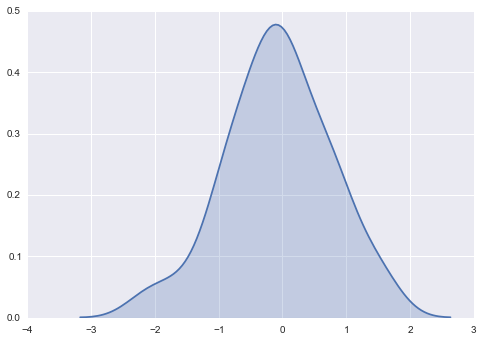

In [73]:
sns.kdeplot(x, shade=True);

The bandwidth (``bw``) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

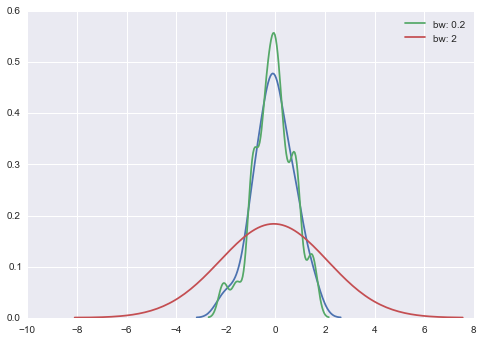

In [74]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

As you can see above, the nature of the Gaussian KDE process means that estimation extends past the largest and smallest values in the dataset. It's possible to control how far past the extreme values the curve is drawn with the ``cut`` parameter; however, this only influences how the curve is drawn and not how it is fit:

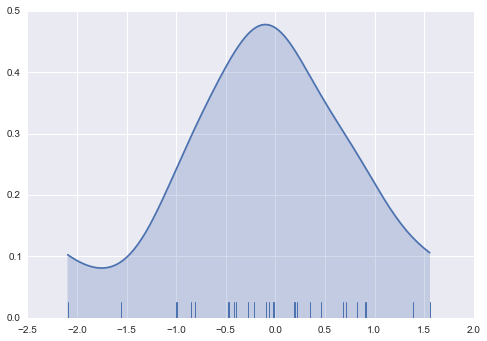

In [75]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

## Fitting parametric distributions

You can also use `distplot()` to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

In [8]:
x = np.random.gamma(6, size=200)

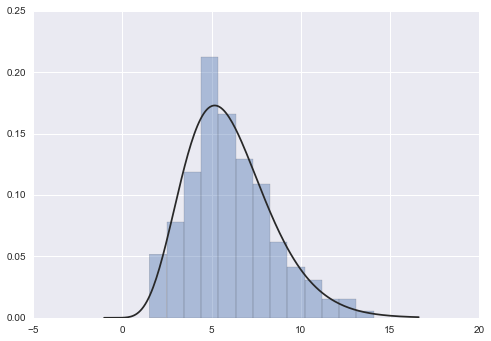

In [76]:
sns.distplot(x, kde=False, fit=stats.gamma);

## Plotting bivariate distributions

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just the `jointplot()` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [9]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

### Scatterplots

The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the *x* and *y* values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib ``plt.scatter`` function, and it is also the default kind of plot shown by the `jointplot()` function:

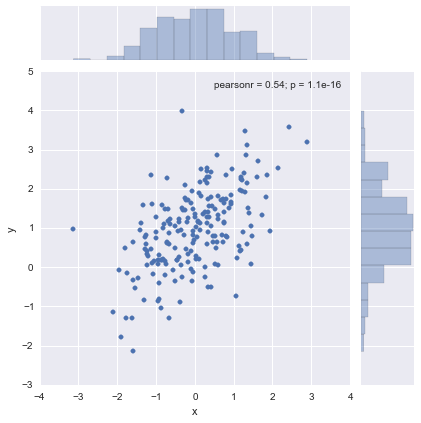

In [78]:
sns.jointplot(x="x", y="y", data=df);

### Hexbin plots

The bivariate analogue of a histogram is known as a "hexbin" plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It's availible through the matplotlib ``plt.hexbin`` function and as a style in `jointplot()`. It looks best with a white background:

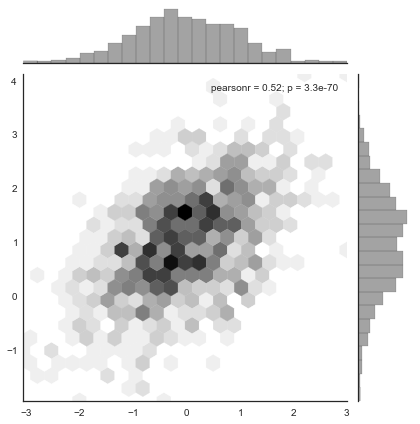

In [79]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

### Kernel density estimation

It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in `jointplot()`:

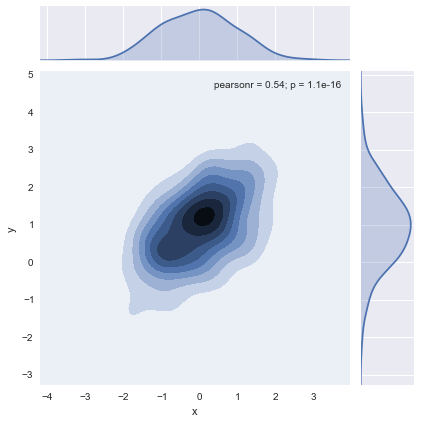

In [80]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

You can also draw a two-dimensional kernel density plot with the `kdeplot()` function. This allows you to draw this kind of plot onto a specific (and possibly already existing) matplotlib axes, whereas the `jointplot()` function manages its own figure:

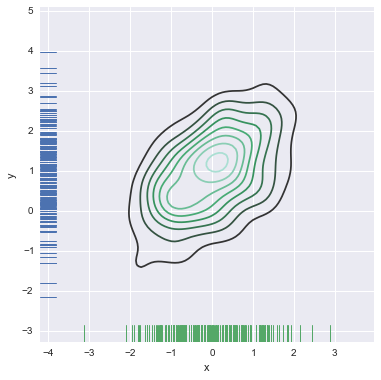

In [81]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

If you wish to show the bivariate density more continuously, you can simply increase the number of contour levels:

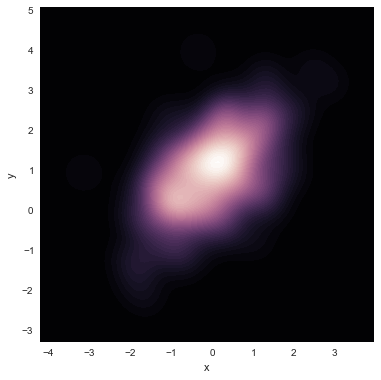

In [82]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

The `jointplot()` function uses a `JointGrid` to manage the figure. For more flexibility, you may want to draw your figure by using `JointGrid` directly. `jointplot()` returns the `JointGrid` object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

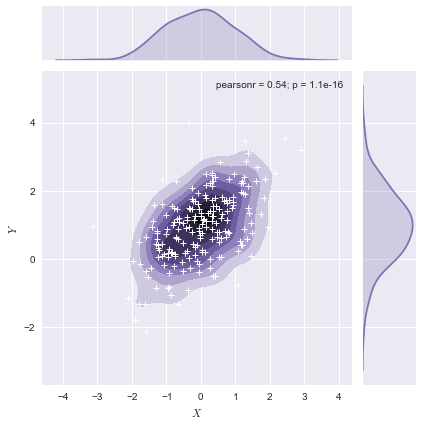

In [83]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset, you can use the `pairplot()` function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

In [11]:
iris = sns.load_dataset('iris', cache=False)#cache=False carga de internet, por defecto es True que carga de la pc
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


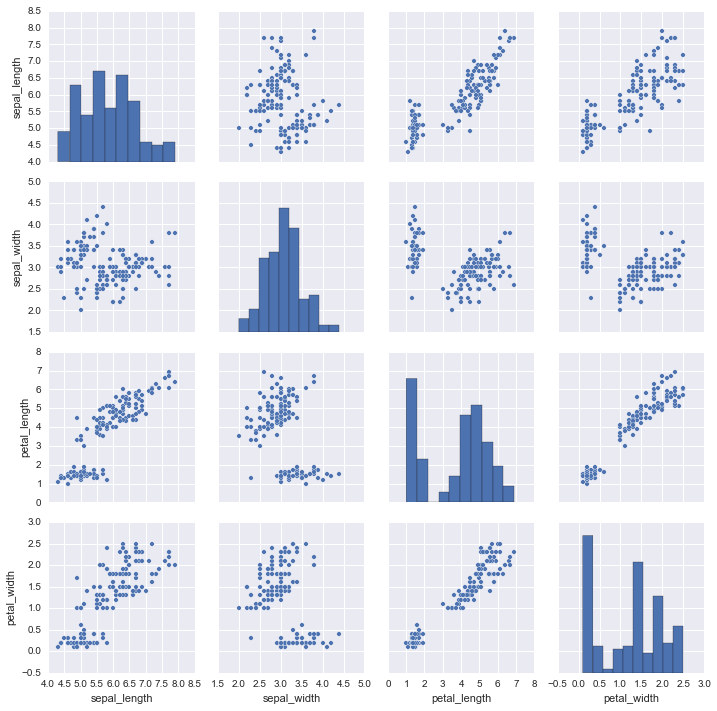

In [12]:
sns.pairplot(iris);

Much like the relationship between `jointplot()` and `JointGrid`, the `pairplot()` function is built on top of a `PairGrid` object, which can be used directly for more flexibility:

/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


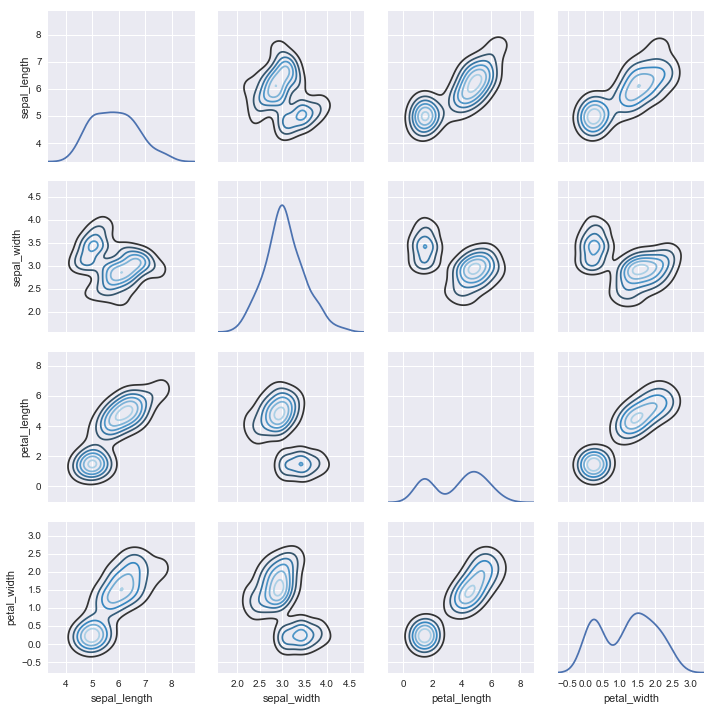

In [12]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

# Visualizing linear relationships

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. We previously discussed (*Visualizing the distribution of a dataset*) functions that can accomplish this by showing the joint distribution of two variables. It can be very helpful, though, to use statistical models to estimate a simple relationship between two noisy sets of observations. The functions discussed in this chapter will do so through the common framework of linear regression.

In the spirit of ***Tukey***, the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. That is to say that seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use [**statsmodels**](http://statsmodels.sourceforge.net/). The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

In [ ]:
#%matplotlib inline

In [ ]:
#import numpy as np
#import pandas as pd
#import matplotlib as mpl
#import matplotlib.pyplot as plt

In [5]:
#import seaborn as sns
sns.set(color_codes=True)

In [6]:
np.random.seed(sum(map(ord, "regression")))

In [8]:
tips = sns.load_dataset("tips", cache=False)#cache=False carga de internet, por defecto es True que carga de la pc

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Functions to draw linear regression models

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, `regplot()` and `lmplot()` are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, ``x`` and ``y``, and then fit the regression model ``y ~ x`` and plot the resulting regression line and a 95% confidence interval for that regression:

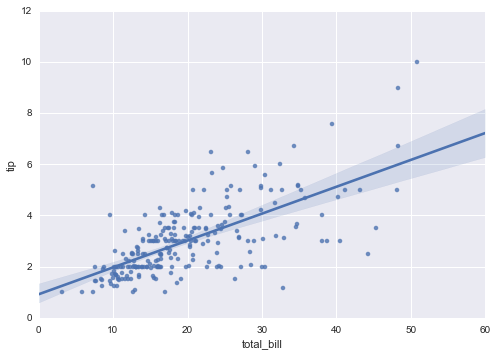

In [13]:
sns.regplot(x="total_bill", y="tip", data=tips);

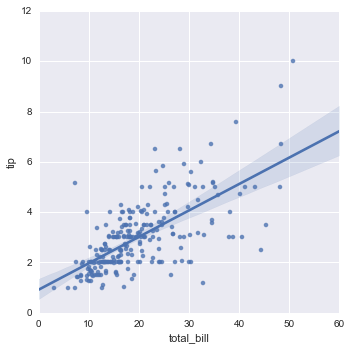

In [14]:
sns.lmplot(x="total_bill", y="tip", data=tips);

You should note that the resulting plots are identical, except that the figure shapes are different. We will explain why this is shortly. For now, the other main difference to know about is that `regplot()` accepts the ``x`` and ``y`` variables in a variety of formats including simple numpy arrays, pandas ``Series`` objects, or as references to variables in a pandas ``DataFrame`` object passed to ``data``. In contrast, `lmplot()` has ``data`` as a required parameter and the ``x`` and ``y`` variables must be specified as strings. This data format is called "long-form" or ["tidy"](http://vita.had.co.nz/papers/tidy-data.pdf) data. Other than this input flexibility, `regplot()` possesses a subset of `lmplot()`'s features, so we will demonstrate them using the latter.

It's possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

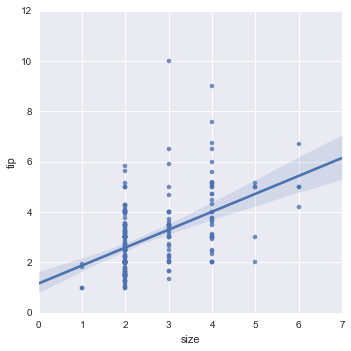

In [15]:
sns.lmplot(x="size", y="tip", data=tips);

One option is to add some random noise ("jitter") to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

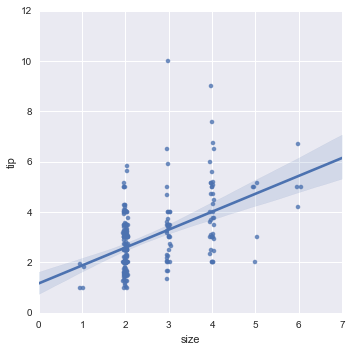

In [16]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

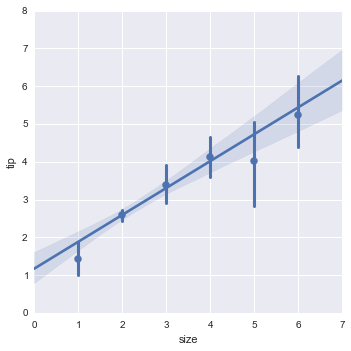

In [17]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

### Fitting different kinds of models

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

In [18]:
anscombe = sns.load_dataset("anscombe", cache=False)

In [22]:
anscombe.tail()

,dataset,x,y
39,IV,8,5.25
40,IV,19,12.50
41,IV,8,5.56
42,IV,8,7.91
43,IV,8,6.89


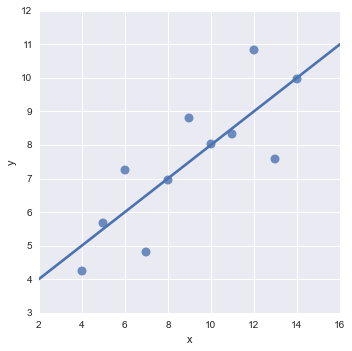

In [27]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

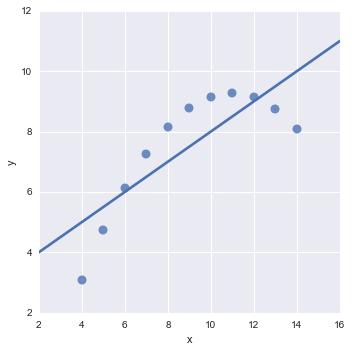

In [28]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

In the presence of these kind of higher-order relationships, `lmplot()` and `regplot()` can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

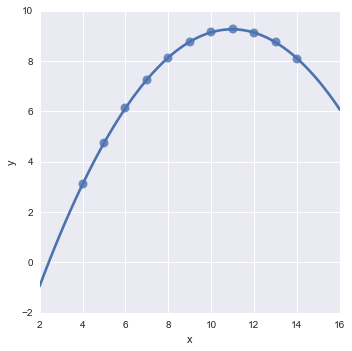

In [29]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

A different problem is posed by "outlier" observations that deviate for some reason other than the main relationship under study:

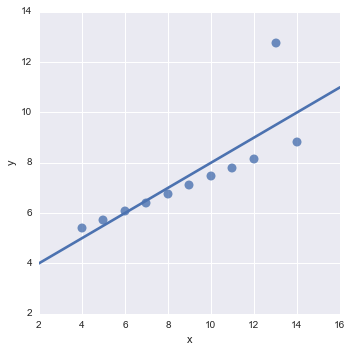

In [30]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

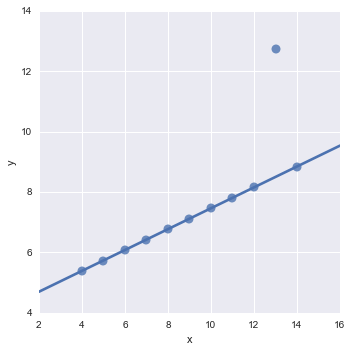

In [31]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

When the ``y`` variable is binary, simple linear regression also "works" but provides implausible predictions:

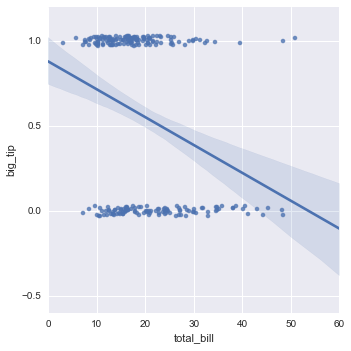

In [34]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of ``y = 1`` for a given value of ``x``:

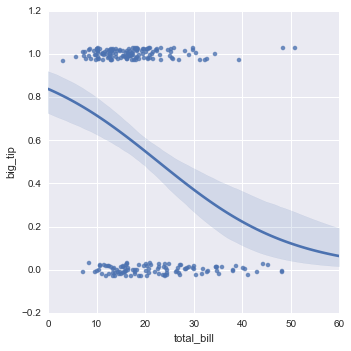

In [35]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well) than simple regression, and as the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ``ci=None``).

An altogether different approach is to fit a nonparametric regression using a [lowess smoother](https://en.wikipedia.org/wiki/Local_regression). This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:

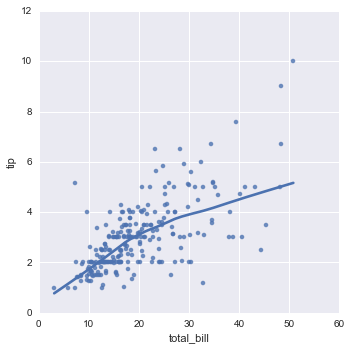

In [39]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

The `residplot()` function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around ``y = 0``:

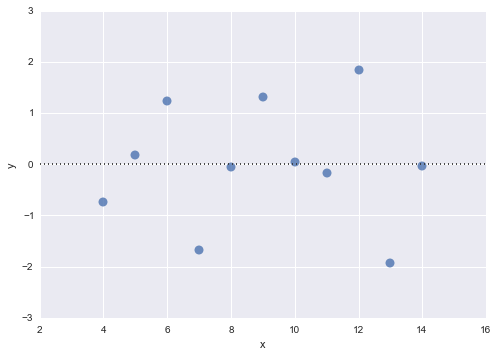

In [40]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

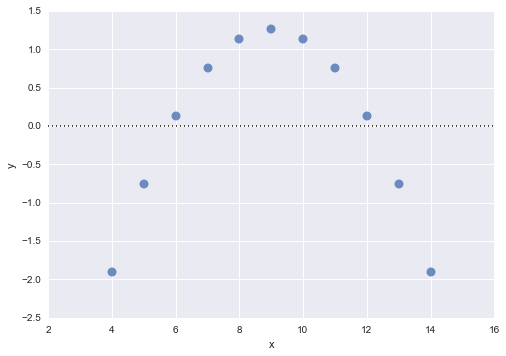

In [41]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## Conditioning on other variables

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is "how does the relationship between these two variables change as a function of a third variable?" This is where the difference  between `regplot()` and `lmplot()` appears. While `regplot()` always shows a single relationsihp, `lmplot()` combines `regplot()` with `FacetGrid` to provide an easy interface to show a linear regression on "faceted" plots that allow you to explore interactions with up to three additional categorical variables.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


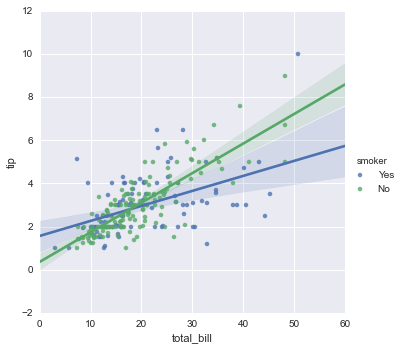

In [43]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In addition to color, it's possible to use different scatterplot markers to make plots the reproduce to black and white better. You also have full control over the colors used:

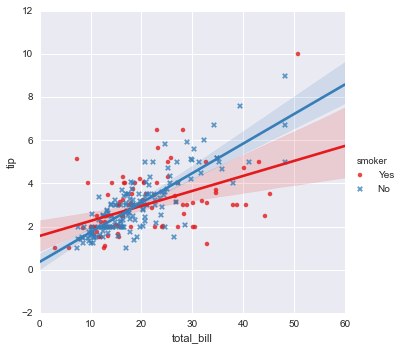

In [44]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

To add another variable, you can draw multiple "facets" which each level of the variable appearing in the rows or columns of the grid:

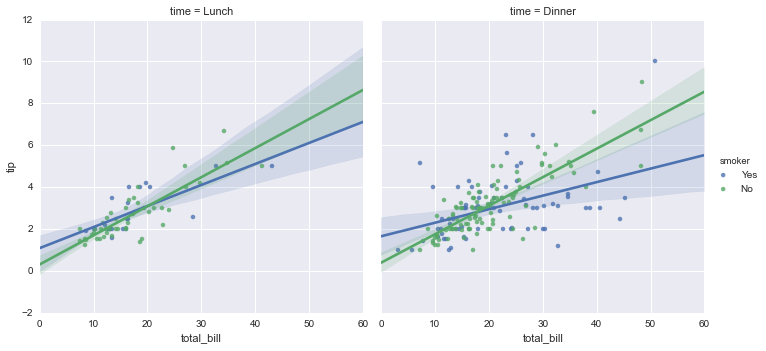

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

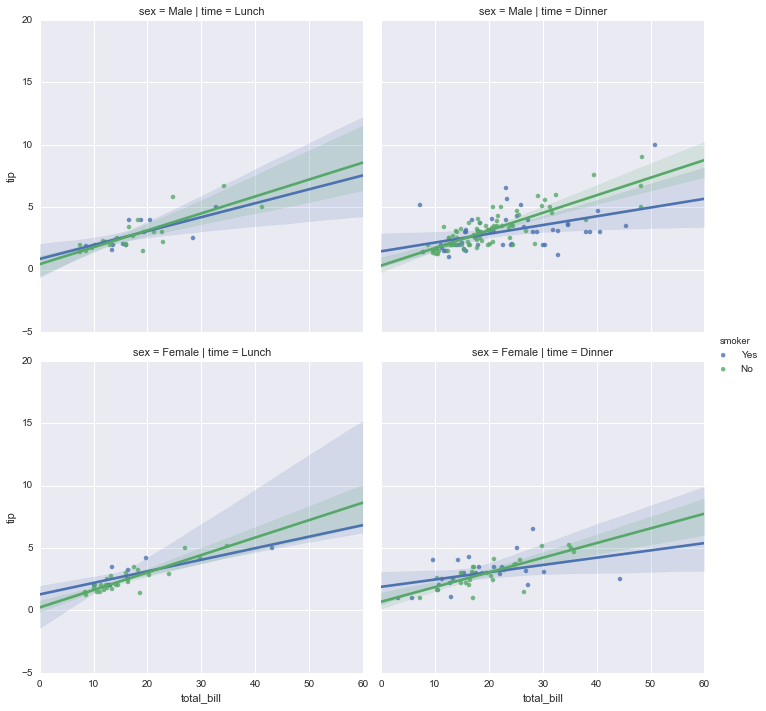

In [46]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## Controlling the size and shape of the plot

Before we noted that the default plots made by `regplot()` and `lmplot()` look the same but on axes that have a different size and shape. This is because `regplot()` is an "axes-level" function draws onto a specific axes. This means that you can make mutli-panel figures yourself and control exactly where the the regression plot goes. If no axes is provided, it simply uses the "currently active" axes, which is why the default plot has the same size and shape as most other matplotlib functions. To control the size, you need to create a figure object yourself.

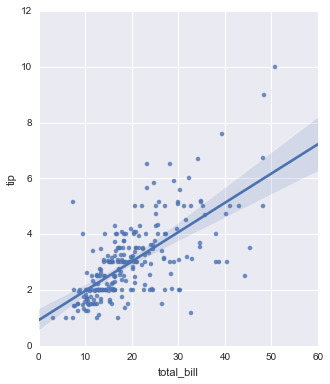

In [47]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

In contrast, the size and shape of the `lmplot()` figure is controlled through the `FacetGrid` interface using the ``size`` and ``aspect`` parameters, which apply to each *facet* in the plot, not to the overall figure itself:

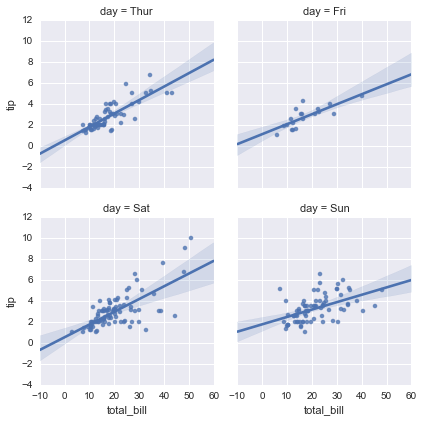

In [48]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

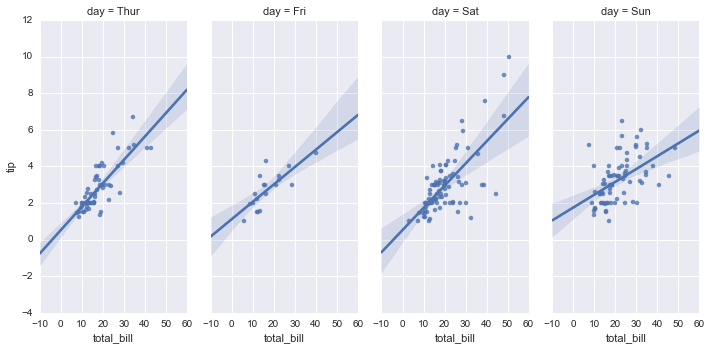

In [52]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

## Plotting a regression in other contexts

A few other seaborn functions use `regplot()` in the context of a larger, more complex plot. The first is the `jointplot()` function that we introduced in *Visualizing the distribution of a dataset*. In addition to the plot styles previously discussed, `jointplot()` can use `regplot()` to show the linear regression fit on the joint axes by passing ``kind="reg"``:

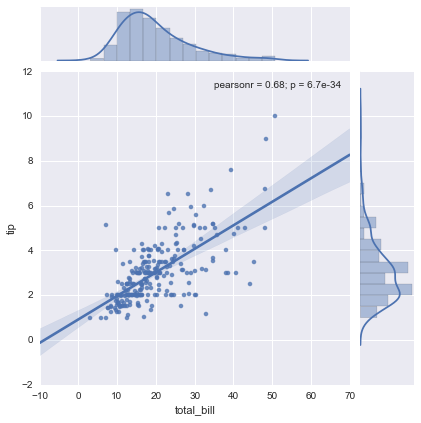

In [53]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

Using the `pairplot()` function with ``kind="reg"`` combines `regplot()` and `PairGrid` to show the linear relationship between variables in a dataset. Take care to note how this is different from `lmplot()`. In the figure below, the two axes don't show the same relationship conditioned on two levels of a third variable; rather, `PairGrid` is used to show multiple relationships between different pairings of the variables in a dataset:

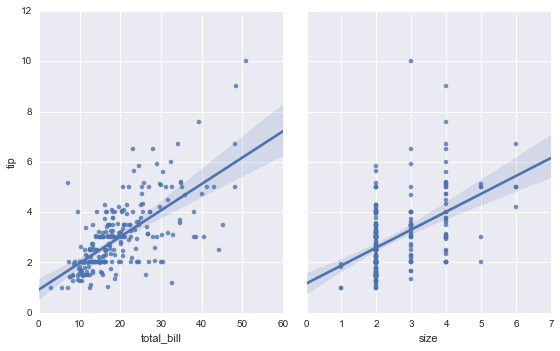

In [54]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

Like `lmplot()`, but unlike `jointplot()`, conditioning on an additional categorical variable is built into `pairplot()` using the ``hue`` parameter:

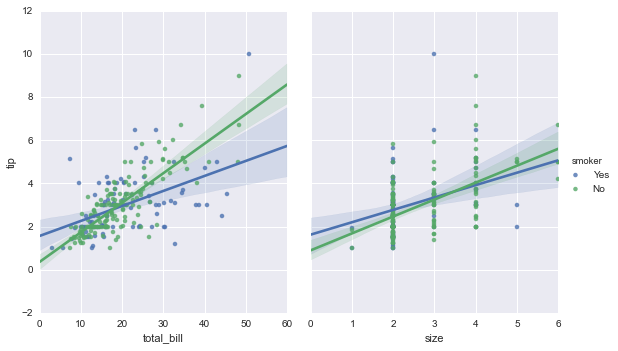

In [55]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

# Plotting with categorical data

We previously (*Visualizing linear relationships*) learned how to use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won't work. There are several options, however, for visualizing such a relationship, which we will discuss in this tutorial.

It's useful to divide seaborn's categorical plots into two groups: those that show the full distribution of observations within each level of the categorical variable, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. The former includes the functions `stripplot()`, `boxplot()`, and `violinplot()`, while the latter includes the functions `barplot()`, `countplot()`, and `pointplot()`. These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

Much like the relationship between `regplot()` and `lmplot()`, in seaborn there are both relatively low-level and relatively high-level approaches for making categorical plots. The functions named above are all low-level in that they plot onto a specific matplotlib axes. There is also the higher-level `factorplot()`, which combines these functions with a `FacetGrid` to apply a categorical plot across a grid of figure panels.

It is easiest and best to invoke these functions with a DataFrame that is in ["tidy"](http://vita.had.co.nz/papers/tidy-data.pdf) format, although the lower-level functions also accept wide-form DataFrames or simple vectors of observations. See below for examples.

In [56]:
#import numpy as np
#import pandas as pd
#import matplotlib as mpl
#import matplotlib.pyplot as plt

In [58]:
#import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [ ]:
np.random.seed(sum(map(ord, "categorical")))

In [57]:
titanic = sns.load_dataset("titanic", cache=False)
tips = sns.load_dataset("tips", cache=False)
iris = sns.load_dataset("iris", cache=False)

## Distributions of observations within categories

The first set of functions shows the full distribution of the quantitative variable within each level of the categorical variable(s). These generalize some of the approaches we discussed in *Visualizing the distribution of a dataset* to the case where we want to quickly compare across several distributions.

### Categorical scatterplots

A simple way to show the distribution of some quantitative variable across the levels of a categorical variable uses `stripplot()`, which generalizes a scatterplot to the case where one of the variables is categorical:

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips);

It's also possible to add a nested categorical variable with the ``hue`` parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables:

In [ ]:
sns.stripplot(x="day", y="total_bill", hue="time", data=tips);

In [ ]:
sns.stripplot(x="size", y="total_bill", data=tips.sort("size"));

With these plots, it's often helpful to put the categorical variable on the vertical axis (this is particularly useful when the category names are relatively long or there are many categories):

In [ ]:
sns.stripplot(x="total_bill", y="day", hue="time", data=tips);

### Boxplots

At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels.

The first is the familiar `boxplot()`. This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

### Violinplots

A different approach is a `violinplot()`, which combines a boxplot with the kernel density estimation procedure described in *Visualizing the distribution of a dataset*:

In [ ]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

This approach uses the kernel density estimate to provide a better description of the distribution of values. Additionally, the quartile and whikser values from the boxplot are shown inside the violin. Because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

In [ ]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

It's also possible to "split" the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

In [ ]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

In [ ]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");

It can also be useful to combine `stripplot()` with `violinplot()` or `boxplot()` to show each observation along with a summary of the distribution:

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, size=4);

## Statistical estimation within categories

Often, rather than showing the distribution within each category, you might want to show the central tendency of the values. Seaborn has two main ways to show this information, but importantly, the basic API for these functions is identical to that for the ones discussed above.

### Bar plots

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the `barplot()` function operates on a full dataset and shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

In [ ]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it's easy to do so with the `countplot()` function:

In [ ]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

Both `barplot()` and `countplot()` can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function:

In [ ]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

### Point plots

An alternative style for visualizing the same information is offered by the `pointplot()` function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same ``hue`` category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes:

In [ ]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

To make figures that reproduce well in black and white, it can be good to use different markers and line styles for the levels of the ``hue`` category:

In [ ]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

## Drawing multi-panel categorical plots

As we mentioned above, there are two ways to draw categorical plots in seaborn. Similar to the duality in the regression plots, you can either use the functions introduced above, or the higher-level function `factorplot()`, which combines these functions with a `FacetGrid` to add the ability to examine additional categories through the larger structure of the figure.

While the main options for each plot kind are available either way, the lower-level functions have a bit more flexibility in the kind of inputs they can take. For instance, you can just pass a ``DataFrame`` to the ``data`` parameter, and the distribution or central tendency of each *column* in the dataframe will be shown:

In [ ]:
sns.boxplot(data=iris, orient="h");

Additionally, these functions accept vectors of Pandas or numpy objects rather than variables in a ``DataFrame``:

In [ ]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

To control the size and shape of plots made by the functions discussed above, you must set up the figure yourself using matplotlib commands. Of course, this also means that the plots can happily coexist in a multi-panel figure with other kinds of plots:

In [ ]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

The `factorplot()` function is a higher-level wrapper on these plots that produces a matplotlib figure managed through a `FacetGrid`:

In [ ]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

By default it uses `pairplot()`, but the ``kind`` parameter lets you chose any of the kinds of plots discussed above:

In [ ]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

The key advantage of `factorplot()` is that it's easy to add faceting by additional variables in the ``DataFrame``, such as along the columns:

In [ ]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="bar");

Any kind of plot can be drawn. Because of the way `FacetGrid` works, to change the size and shape of the figure you need to specify the ``size`` and ``aspect`` arguments, which apply to each facet:

In [ ]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

Because of the generalized API of the categorical plots, they should be easy to apply to other more complex contexts. For example, they are easily combined with a `PairGrid` to show categorical relationships across several different variables:

In [ ]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");

# Plotting on data-aware grids

When exploring medium-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of your dataset. This technique is sometimes called either "lattice", or ["trellis"](http://netlib.bell-labs.com/cm/ms/departments/sia/project/trellis) plotting, and it is related to the idea of ["small multiples"](http://en.wikipedia.org/wiki/Small_multiple). It allows a viewer to quickly extract a large amount of information about complex data. Matplotlib offers good support for making figures with multiple axes; seaborn builds on top of this to directly link the structure of the plot to the structure of your dataset.

To use these features, your data has to be in a Pandas DataFrame and it must take the form of what Hadley Whickam calls ["tidy" data](http://vita.had.co.nz/papers/tidy-data.pdf). In brief, that means your dataframe should be structured such that each column is a variable and each row is an observation.

For advanced use, you can use the objects discussed in this part of the tutorial directly, which will provide maximum flexibility. Some seaborn functions (such as `lmplot()`, `factorplot()`, and `pairplot()`) also use them behind the scenes. Unlike other seaborn functions that are "Axes-level" and draw onto specific (possibly already-existing) matplotlib ``Axes`` without otherwise manipulating the figure, these higher-level functions create a figure when called and are generally more strict about how it gets set up. In some cases, arguments either to those functions or to the constructor of the class they rely on will provide a different interface attributes like the figure size, as in the case of `lmplot()` where you can set the height and aspect ratio for each facet rather than the overall size of the figure. Any function that uses one of these objects will always return it after plotting, though, and most of these objects have convenience methods for changing how the plot, often in a more abstract and easy way.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))

## Subsetting data with `FacetGrid`

The `FacetGrid` class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A `FacetGrid` can be drawn with up to three dimensions: ``row``, ``col``, and ``hue``. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

The class is used by initializing a `FacetGrid` object with a dataframe and the names of the variables that will form the row, column, or hue dimensions of the grid. These variables should be categorical or discrete, and then the data at each level of the variable will be used for a facet along that axis. For example, say we wanted to examine differences between lunch and dinner in the ``tips`` dataset.

Additionally, both `lmplot()` and `factorplot()` use this object internally, and they return the object when they are finsihed so that it can be used for further tweaking.

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
g = sns.FacetGrid(tips, col="time")

Initializing the grid like this sets up the matplotlib figure and axes, but doesn't draw anything on them.

The main approach for visualizing data on this grid is with the `FacetGrid.map()` method. Provide it with a plotting function and the name(s) of variable(s) in the dataframe to plot. Let's look at the distribution of tips in each of these subsets, using a histogram.

In [ ]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

This function will draw the figure and annotate the axes, hopefully producing a finished plot in one step. To make a relational plot, just pass multiple variable names. You can also provide keyword arguments, which will be passed to the plotting function:

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

There are several options for controlling the look of the grid that can be passed to the class constructor.

In [ ]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

Note that ``margin_titles`` isn't formally supported by the matplotlib API, and may not work well in all cases. In particular, it currently can't be used with a legend that lies outside of the plot.

The size of the figure is set by providing the height of *each* facet, along with the aspect ratio:

In [ ]:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

With versions of matplotlib > 1.4, you can pass parameters to be used in the `gridspec` module. The can be used to draw attention to a particular facet by increasing its size. It's particularly useful when visualizing distributions of datasets with unequal numbers of groups in each facet.

In [ ]:
titanic = sns.load_dataset("titanic")
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort("deck")
g = sns.FacetGrid(titanic, col="class", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "deck", "age");

The default ordering of the facets is derived from the information in the DataFrame. If the variable used to define facets has a categorical type, then the order of the categories is used. Otherwise, the facets will be in the order of appearence of the category levels. It is possible, however, to specify an ordering of any facet dimension with the appropriate ``*_order`` parameter:

In [ ]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

Any seaborn color palette (i.e., something that can be passed to `color_palette()` can be provided. You can also use a dictionary that maps the names of values in the ``hue`` variable to valid matplotlib colors:

In [ ]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

You can also let other aspects of the plot vary across levels of the hue variable, which can be helpful for making plots that will be more comprehensible when printed in black-and-white. To do this, pass a dictionary to ``hue_kws`` where keys are the names of plotting function keyword arguments and values are lists of keyword values, one for each level of the hue variable.

In [ ]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

If you have many levels of one variable, you can plot it along the columns but "wrap" them so that they span multiple rows. When doing this, you cannot use a ``row`` variable.

In [ ]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, size=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);

Once you've drawn a plot using `FacetGrid.map()` (which can be called multiple times), you may want to adjust some aspects of the plot. There are also a number of methods on the `FacetGrid` object for manipulating the figure at a higher level of abstraction. The most general is `FacetGrid.set()`, and there are other more specialized methods like `FacetGrid.set_axis_labels()`, which respects the fact that interior facets do not have axis labels. For example:

In [ ]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

For even more customization, you can  work directly with the underling matplotlib ``Figure`` and ``Axes`` objects, which are stored as member attributes at ``fig`` and ``axes`` (a two-dimensional array), respectively. When making a figure without row or column faceting, you can also use the ``ax`` attribute to directly access the single axes.

In [ ]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, size=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

### Mapping custom functions onto the grid

You're not limited to existing matplotlib and seaborn functions when using `FacetGrid`. However, to work properly, any function you use must follow a few rules:

1. It must plot onto the "currently active" matplotlib ``Axes``. This will be true of functions in the ``matplotlib.pyplot`` namespace, and you can call ``plt.gca`` to get a reference to the current ``Axes`` if you want to work directly with its methods.
2. It must accept the data that it plots in positional arguments. Internally, `FacetGrid` will pass a ``Series`` of data for each of the named positional arguments passed to `FacetGrid.map()`.
3. It must be able to accept ``color`` and ``label`` keyword arguments, and, ideally, it will do something useful with them. In most cases, it's easiest to catch a generic dictionary of ``**kwargs`` and pass it along to the underlying plotting function.

Let's look at minimal example of a function you can plot with. This function will just take a single vector of data for each facet:

In [ ]:
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    
g = sns.FacetGrid(tips, col="sex", size=4)
g.map(quantile_plot, "total_bill");

If we want to make a bivariate plot, you should write the function so that it accepts the x-axis variable first and the y-axis variable second:

In [ ]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)
    
g = sns.FacetGrid(tips, col="smoker", size=4)
g.map(qqplot, "total_bill", "tip");

Because ``plt.scatter`` accepts ``color`` and ``label`` keyword arguments and does the right thing with them, we can add a hue facet without any difficulty:

In [ ]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend();

This approach also lets us use additional aesthetics to distinguish the levels of the hue variable, along with keyword arguments that won't be depdendent on the faceting variables:

In [ ]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend();

Sometimes, though, you'll want to map a function that doesn't work the way you expect with the ``color`` and ``label`` keyword arguments. In this case, you'll want to explictly catch them and handle them in the logic of your custom function. For example, this approach will allow use to map ``plt.hexbin``, which otherwise does not play well with the `FacetGrid` API:

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", size=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

## Plotting pairwise relationships with `PairGrid` and `pairplot()`

`PairGrid` also allows you to quickly draw a grid of small subplots using the same plot type to visualize data in each. In a `PairGrid`, each row and column is assigned to a different variable, so the resulting plot shows each pairwise relationship in the dataset. This style of plot is sometimes called a "scatterplot matrix", as this is the most common way to show each relationship, but `PairGrid` is not limited to scatterplots.

It's important to understand the differences between a `FacetGrid` and a `PairGrid`. In the former, each facet shows the same relationship conditioned on different levels of other variables. In the latter, each plot shows a different relationship (although the upper and lower triangles will have mirrored plots). Using `PairGrid` can give you a very quick, very high-level summary of interesting relationships in your dataset.

The basic usage of the class is very similar to `FacetGrid`. First you initialize the grid, then you pass plotting function to a ``map`` method and it will be called on each subplot. There is also a companion function, `pairplot()` that trades off some flexibility for faster plotting.

In [ ]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

It's possible to plot a different function on the diagonal to show the univariate distribution of the variable in each column. Note that the axis ticks won't correspond to the count or density axis of this plot, though.

In [ ]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

A very common way to use this plot colors the observations by a separate categorical variable. For example, the iris dataset has four measurements for each of three different species of iris flowers so you can see how they differ.

In [ ]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

By default every numeric column in the dataset is used, but you can focus on particular relationships if you want.

In [ ]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

It's also possible to use a different function in the upper and lower triangles to emphasize different aspects of the relationship.

In [ ]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);

The square grid with identity relationships on the diagonal is actually just a special case, and you can plot with different variables in the rows and columns.

In [ ]:
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], size=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);

Of course, the aesthetic attributes are configurable. For instance, you can use a different palette (say, to show an ordering of the ``hue`` variable) and pass keyword arguments into the plotting functions.

In [ ]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

`PairGrid` is flexible, but to take a quick look at a dataset, it can be easier to use `pairplot()`. This function uses scatterplots and histograms by default, although a few other kinds will be added (currently, you can also plot regression plots on the off-diagonals and KDEs on the diagonal).

In [ ]:
sns.pairplot(iris, hue="species", size=2.5);

You can also control the aesthetics of the plot with keyword arguments, and it returns the `PairGrid` instance for further tweaking.

In [ ]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)

# Data visualization with Seaborn

Seaborn provides an API on top of matplotlib, which uses sane plot and color defaults and simple functions for common statistical plot types.  
Let’s take a look at Seaborn in action. We’ll start by importing the key libraries we’ll need.

In [ ]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Then we import seaborn, which by convention is imported as ```sns```. We can set the seaborn style as the default matplotlib style by calling ```sns.set()```: after doing this, even simple matplotlib plots will look much better. Let’s look at a before and after:

In [ ]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), x, np.cos(x));

In [ ]:
import seaborn as sns
sns.set()
plt.plot(x, np.sin(x), x, np.cos(x));

Ah, much better!

## Exploring Seaborn Plots

The main idea of Seaborn is that it can create complicated plot types from Pandas data with relatively simple commands.

Let’s take a look at a few of the datasets and plot types available in Seaborn. Note that all o the following *could* be done using raw matplotlib commands (this is, in fact, what Seaborn does under the hood) but the seaborn API is much more convenient.  

### Histograms, KDE, and Densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. Seaborn provides simple tools to make this happen:

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation:

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using `distplot()`:

In [ ]:
sns.distplot(data['x']);

If we pass the full two-dimensional dataset to `kdeplot()`, we will get a two-dimensional visualization of the data:

In [ ]:
sns.kdeplot(data);

We can see the joint distribution and the marginal distributions together using `sns.jointplot()`. For this plot, we’ll set the style to a white background:

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters which can be passed to `jointplot()`: for example, we can use a hexagonally-based histogram instead:

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pairplots

When you generalize joint plots to data sets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multi-dimensional data, when you’d like to plot all pairs of values against each other.

We’ll demo this with the well-known iris dataset, which lists measurements of petals and sepals of three iris species:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

Visualizing the multi-dimensional relationships among the samples is as easy as calling `sns.pairplot()`:

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

### Faceted Histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn’s `FacetGrid` makes this extremely simple. We’ll take a look at some data which shows the amount that restaurant staff receive in tips based on various indicator data:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor Plots

Factor plots can be used to visualize this data as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

## Joint Distributions

Similar to the pairplot we saw above, we can use `sns.jointplot()` to show the joint distribution between different datasets, along with the associated marginal distributions:

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

In [ ]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar Plots

Time series can be plotted using `sns.factorplot()`:

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=1.5)
    g.set_xticklabels(step=5)

We can learn more by looking at the **method** of discovery of each of these planets:

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0,
                       hue='method', x_order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [seaborn documentation](http://stanford.edu/~mwaskom/software/seaborn), the [seaborn gallery](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html), and the [official seaborn tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html).